<a href="https://colab.research.google.com/github/baba8959/Baba_Shaik-Assignment_6_7/blob/main/Baba_Shaik_Assignment_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools as it
from sklearn.linear_model import LinearRegression
mind = LinearRegression()
from sklearn.linear_model import LinearRegression

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [190]:
df = pd.read_fwf("/content/brain_body.txt")

In [191]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


<function matplotlib.pyplot.show(*args, **kw)>

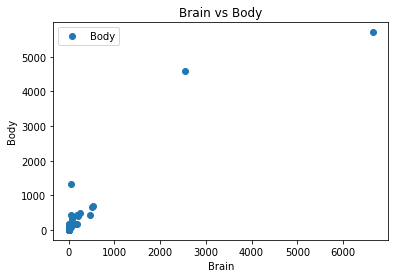

In [192]:
from pandas.io.formats import style
df.plot(x='Brain', y='Body',style = "o")
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show

In [193]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [194]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [195]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)


LinearRegression()

In [196]:
print(regressor.intercept_)
print(regressor.coef_)

91.00439620740687
[0.96649637]


In [197]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
.format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = 0.9665 * x + 91.0044


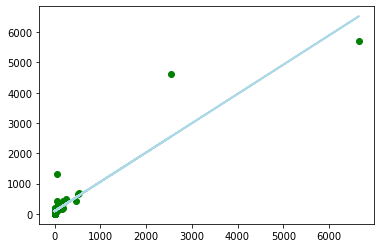

In [198]:
plt.scatter(x, y, color ='green')
plt.plot(x, regressor.predict(x), color = "lightblue", linewidth =2)

In [199]:
print('R-squred:', regressor.score(x, y))

R-squred: 0.8726620843043331


**The score  is > 0.8, so it is a good fit for this data**

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [200]:
df = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [201]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [202]:
feature = ['Sex', 'Rank', 'Year',  'Degree', 'YSdeg']
x = df[feature]
y = df.Salary

In [203]:
y

0     36350
1     35350
2     28200
3     26775
4     33696
5     28516
6     24900
7     31909
8     31850
9     32850
10    27025
11    24750
12    28200
13    23712
14    25748
15    29342
16    31114
17    24742
18    22906
19    24450
20    19175
21    20525
22    27959
23    38045
24    24832
25    25400
26    24800
27    25500
28    26182
29    23725
30    21600
31    23300
32    23713
33    20690
34    22450
35    20850
36    18304
37    17095
38    16700
39    17600
40    18075
41    18000
42    20999
43    17250
44    16500
45    16094
46    16150
47    15350
48    16244
49    16686
50    15000
51    20300
Name: Salary, dtype: int64

In [204]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [205]:
print('Features & Coefficients')
print(list(zip(feature, linreg.coef_)))

Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [206]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [207]:
def lin_reg_eq_print(salary_discrim_cols,df):
  input_cols = df[salary_discrim_cols]
  salary = df['Salary']
  regr_sd = linear_model.LinearRegression()
  regr_sd.fit(input_cols,salary)
  print('The equation for column{} with respect to Salary:\n'
  '{} + {}'.format(salary_discrim_cols, regr_sd.coef_, regr_sd.intercept_))

In [208]:
lin_reg_eq_print(salary_discrim_cols, df)

The equation for column['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [209]:
def lin_reg_wrt_focus(salary_discrim_cols, df, focus="Salary"):
  input_cols = df[salary_discrim_cols]
  focus_output = df[focus]
  regr_sd = linear_model.LinerRegression()
  regr_sd.fit(input_cols, focus_output)
  return regr_sd.score(input_cols, focus_output)

In [220]:
print('R^2 score for equation using all columns: {}'
    .format(lin_reg_wrt_focus(salary_discrim_cols, df)))

AttributeError: ignored

In [212]:
def get_combos(cols):
  return [it.combinations(cols, n+1) for n in range(len(cols))]

In [213]:
combos = get_combos(salary_discrim_cols)

In [214]:
def all_combo_scores(combos, df,  focus ="Salary"):
  combo_scores = {}
  for m in range(len(list(combos))):
    for n in list(combos[m]):
      combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
  return combo_scores

In [215]:
#combo_scores = all_combo_scores(combos, df)
#sorted(combo_scores.items(), key=lambda c: c[0], reverse =True)

In [217]:
num_by_sex = df.Sex.value_counts()
print('Num men:{}\nNum women: {}'. format(num_by_sex[0],num_by_sex))

Num men:38
Num women: 0    38
1    14
Name: Sex, dtype: int64


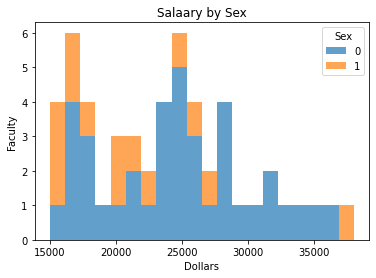

In [222]:
df.pivot_table(index=df.index, columns="Sex", values='Salary') \
    .plot(kind="hist", alpha=0.7, stacked =True, bins =20, title='Salaary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

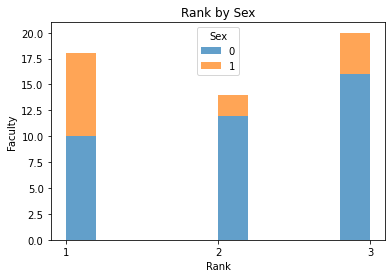

In [225]:
df.pivot_table(index=df.index, columns="Sex", values="Rank") \
    .plot(kind='hist', alpha =0.7, stacked=True, title ="Rank by Sex")
plt.xticks([1,2,3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

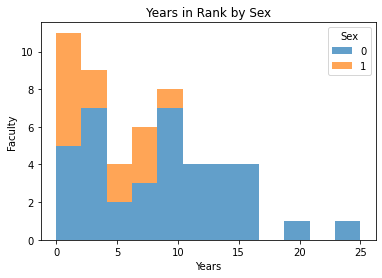

In [230]:
df.pivot_table(index=df.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha =0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

**sex on itsown has a score very close to zero (0.036898925832880038), By this we can conclude that, There is no salary discrimination by Sex.**